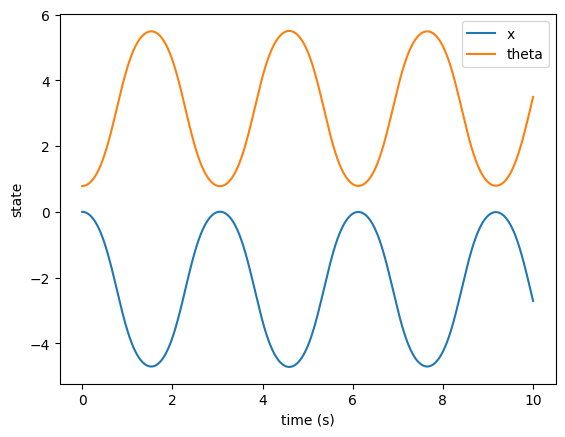

In [42]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the state-space equations
def inverted_pendulum_model(t, y, m, l, g, u):
    x, x_dot, theta, theta_dot = y
    dx_dt = x_dot
    dxdot_dt = (u - m * g * l * np.sin(theta)) / (m * l ** 2)
    dtheta_dt = theta_dot
    dthetadot_dt = (g * np.sin(theta) - u * np.cos(theta)) / (l)
    return [dx_dt, dxdot_dt, dtheta_dt, dthetadot_dt]

# Set up the system parameters
m = 1.0  # mass of pendulum
l = 1.0  # length of pendulum
g = 9.81  # acceleration due to gravity
u = 0.0  # control input

# Initial conditions
y0 = [0.0, 0.0, np.pi/4, 0.0]  # [x, x_dot, theta, theta_dot]

# Time intervals for simulation
t_eval = np.linspace(0, 10, 1000)

# Solve the ODE using the scipy.integrate.solve_ivp function
result = solve_ivp(lambda t, y: inverted_pendulum_model(t, y, m, l, g, u), [0, 10], y0, t_eval=t_eval)

# Plot the results
plt.plot(result.t, result.y[0, :], label='x')
plt.plot(result.t, result.y[2, :], label='theta')
plt.xlabel('time (s)')
plt.ylabel('state')
plt.legend()
plt.show()


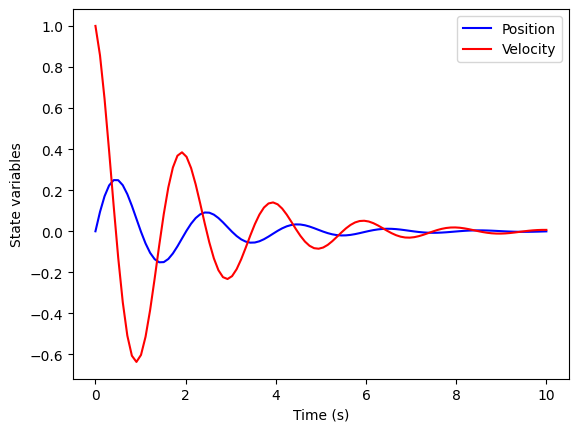

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the state-space equations for a spring-mass-damper system
def spring_mass_damper(y, t, m, k, c):
    x, x_dot = y
    x_ddot = (-k * x - c * x_dot) / m
    return [x_dot, x_ddot]

# Initial conditions for the state variables
y0 = [0, 1]

# Time array for simulation
t = np.linspace(0, 10, 100)

# Parameters for the system
m = 1 # mass (kg)
k = 10 # spring constant (N/m)
c = 1 # damping constant (N·s/m)

# Solve the state-space equations using odeint
sol = odeint(spring_mass_damper, y0, t, args=(m, k, c))

# Extract the state variables from the solution
x = sol[:, 0]
x_dot = sol[:, 1]

# Plot the results
plt.figure()
plt.plot(t, x, 'b-', label='Position')
plt.plot(t, x_dot, 'r-', label='Velocity')
plt.xlabel('Time (s)')
plt.ylabel('State variables')
plt.legend()
plt.show()

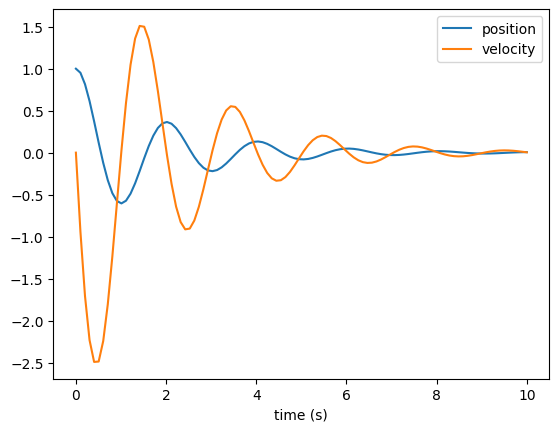

In [43]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the system parameters
m = 1 # mass
k = 10 # spring constant
c = 1 # damping constant

# Define the state-space model equations
def func(t, y, m, k, c):
    x, v = y
    dxdt = v
    dvdt = -(c/m)*v - (k/m)*x
    return [dxdt, dvdt]

# Initial conditions
x0 = 1 # initial position
v0 = 0 # initial velocity
y0 = [x0, v0]

# Time interval
t_eval = np.linspace(0, 10, num=100)

# Solve the ODE using the solve_ivp function from the scipy.integrate module
sol = solve_ivp(fun=lambda t, y: func(t, y, m, k, c), t_span=[0, 10], y0=y0, t_eval=t_eval)

# Plot the results
plt.plot(sol.t, sol.y[0,:], label='position')
plt.plot(sol.t, sol.y[1,:], label='velocity')
plt.legend()
plt.xlabel('time (s)')
plt.show()


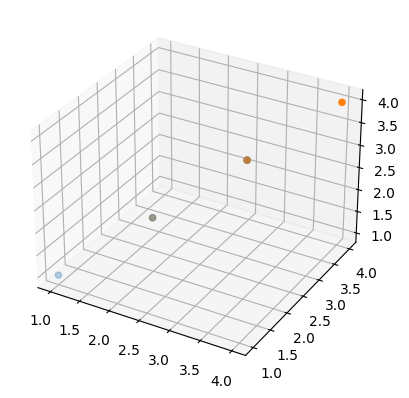

In [47]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Initialize the figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot initial data
x = [1, 2, 3]
y = [1, 2, 3]
z = [1, 2, 3]
ax.scatter(x, y, z)

# Update the data and redraw the plot
x = [2, 3, 4]
y = [2, 3, 4]
z = [2, 3, 4]
ax.scatter(x, y, z)

# Redraw the plot with updated data
plt.draw()
plt.show()


In [17]:
import numpy as np

def constrain_to_range(value):
    return np.mod(value, 2 * np.pi)

value = -360 - 359
constrained_value = constrain_to_range(np.deg2rad(value))
print(constrained_value)

0.01745329251994221
